# 

In [36]:
words = open('names.txt', 'r').read().splitlines()


In [37]:
words[1:10]

['olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [38]:
len(words)

32033

In [39]:
min(len(w) for w in words)

2

In [40]:
max(len(w) for w in words)

15

In [41]:
for w in words:
    len(w)

In [42]:
# bigram model -- 2 ch's in a row

In [43]:
b = {}




for w in words[1:]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = ch1, ch2
        b[bigram] = b.get(bigram, 0) + 1
        


        

In [44]:
import torch



In [45]:
N = torch.zeros((27,27), dtype = torch.int32)


In [46]:
chars = sorted(list(set(''.join(words ))))

stoi = {s: i+1 for i,s in enumerate(chars)}

stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [47]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [48]:





for w in words[1:]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        


        

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

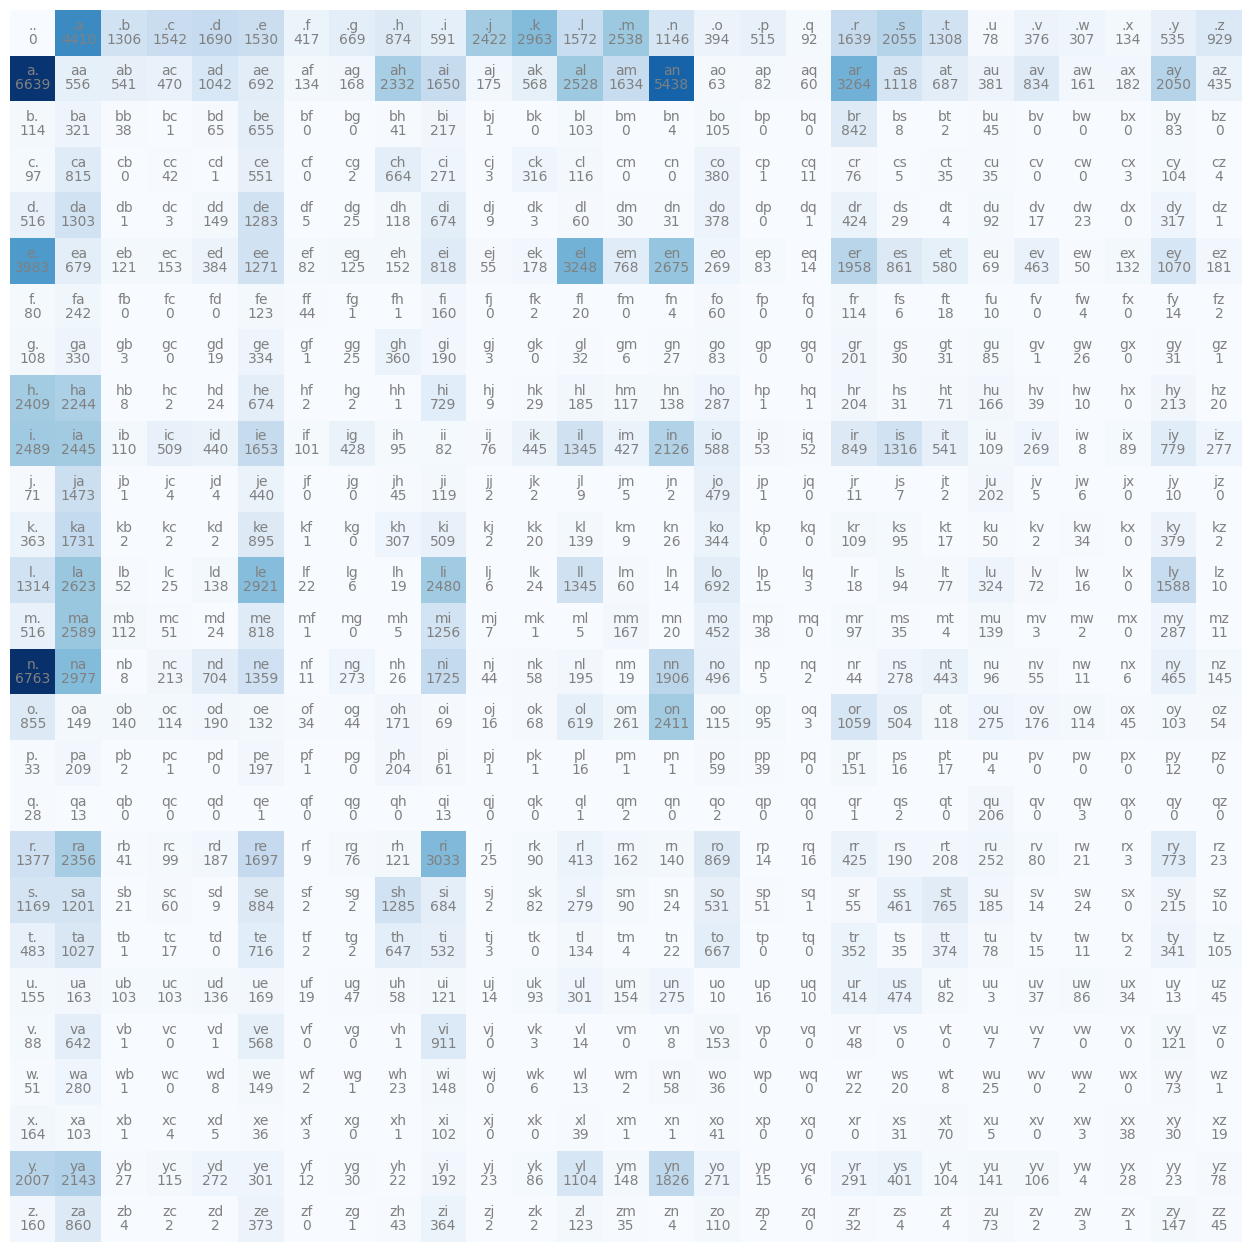

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i , chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha = 'center', va='top', color='gray')
plt.axis('off')

In [50]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1530,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [51]:
p = N[0].float() 
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0185, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [52]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [53]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [54]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [55]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [56]:
P = (N+1).float()
#P = P/ P.sum()
P /= P.sum(1, keepdim=True)

In [57]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    
    while True:
        p = P[ix]
        #p = torch.ones(27)/ 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [58]:
log_liklihood = 0.0
n = 0



for w in ["arsh"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logProb = torch.log(prob)
        log_liklihood += logProb
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logProb:.4f}")
        

print(f"{log_liklihood=}")
nll = -log_liklihood
print(f"{nll=}")
print(f"{nll/n}")
        

.a: 0.1376 -1.9835
ar: 0.0963 -2.3405
rs: 0.0150 -4.1992
sh: 0.1581 -1.8444
h.: 0.3153 -1.1542
log_liklihood=tensor(-11.5217)
nll=tensor(11.5217)
2.3043441772460938


In [59]:
# create the training set of bigrams (x,y)

xs, ys = [], []






for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(f"{ch1}{ch2}")

xs = torch.tensor(xs)
ys = torch.tensor(ys)
       

.e
em
mm
ma
a.


In [60]:
xs

tensor([ 0,  5, 13, 13,  1])

In [61]:
ys

tensor([ 5, 13, 13,  1,  0])

In [62]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [63]:
xenc.shape

torch.Size([5, 27])

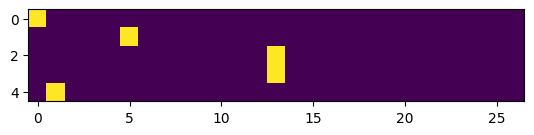

In [64]:
plt.imshow(xenc)

In [65]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.5256,  0.9853,  1.7545,  0.9573, -0.1296,  0.2328, -0.8209, -0.4891,
         -0.8937, -0.4777, -1.1490,  1.2024, -0.7181,  0.5595, -0.5562, -0.7470,
         -1.7508,  1.5040,  1.0779, -0.4499,  0.9919, -0.3444, -1.0069,  0.1377,
          0.6647, -0.4963,  0.4785],
        [-0.0593, -1.2671,  0.0031, -0.1244, -0.6183,  1.0329,  0.4950,  0.6548,
         -0.9007, -0.5443,  0.2899, -0.0927, -0.2929,  0.8047, -0.0407,  0.7944,
          0.4717,  1.9742, -0.8478, -0.0588,  1.1785,  0.3366,  1.4980, -0.1536,
          1.4748, -0.8931, -0.6906],
        [-0.2033,  0.5911,  1.0422,  0.7107, -0.2164,  0.1178, -0.0846,  0.9382,
          1.1574,  1.2865, -0.9394,  0.4725,  0.3936,  1.4011, -0.5416,  0.8094,
          0.2004, -0.4968,  0.2229, -0.1735,  0.6343, -1.8796, -2.2324, -0.9169,
          1.4660, -2.2479,  1.7507],
        [-0.2033,  0.5911,  1.0422,  0.7107, -0.2164,  0.1178, -0.0846,  0.9382,
          1.1574,  1.2865, -0.9394,  0.4725,  0.3936,  1.4011, -0.5416,  0.8094

In [78]:
#  randomly initialize 27 neurons's weights. Each neuron receives 27 inputs

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad = True)

In [81]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits =  xenc @ W # log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for the next ch
loss = -probs[torch.arange(5), ys].log().mean() # vectorized form of the loss

In [83]:
# backward pass
W.grad = None # set the grads to 0
loss.backward()


In [85]:
W.grad.shape

torch.Size([27, 27])

In [ ]:
# update/nudging 

W.data += -0.1 * W.grad